In [26]:
from keras import layers as L
from keras import models as M
from keras.utils import plot_model
import random as pyr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Encrypting and Decrypting using NNs

Can we build NNs which generate a LSH function such that given a sequence of bits and a key.

In [8]:
def random_string(length):
    ln = pyr.choice(range(1, length))
    seq = [[pyr.choice([1, 2])] for _ in range(ln)]
    seq += [[0]] * (length - len(seq))
    return seq

In [52]:
plain_size = 100000
key_size = 1000
hash_dim = 100
batchsize = 100

def datagen(batchsize):
    while True:
        x, y = [], []
        for _ in range(batchsize):
            a = random_string(plain_size)
            b = random_string(key_size)
            x.append(a)
            y.append(b)
        c, d = np.array(x), np.array(y)
        yield [c, d], [c]

In [53]:
data_in = L.Input((plain_size, 1), name='plaintext')
key_in = L.Input((key_size, 1), name='key')

data = L.Masking()(data_in)
keys = L.Reshape((key_size, ))(key_in)

key_rep = L.RepeatVector(plain_size)(keys)
concat = L.Concatenate()([data, key_rep])

encrypt = L.GRU(hash_dim, name='hashed')(concat)

cipher = L.RepeatVector(plain_size)(encrypt)
cipher_and_key = L.Concatenate()([cipher, key_rep])

decrypter = L.GRU(1, return_sequences=True)(cipher_and_key)

model = M.Model([data_in, key_in], decrypter)
model.compile('sgd', 'mse')
plot_model(model, to_file='model.png')

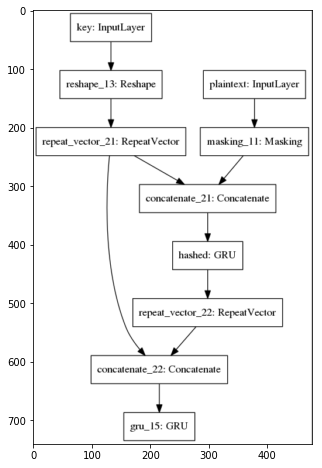

In [54]:
plt.figure(figsize=(5, 9))
imshow(imread('model.png'), interpolation='bilinear')

In [55]:
loss_hist = model.fit_generator(datagen(batchsize), 10, epochs=100)

Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[100,100000,1000]
	 [[Node: repeat_vector_21/Tile = Tile[T=DT_FLOAT, Tmultiples=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](repeat_vector_21/ExpandDims, repeat_vector_21/stack)]]

Caused by op 'repeat_vector_21/Tile', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/arjoonn/env/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/arjoonn/env/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/arjoonn/env/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arjoonn/env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/arjoonn/env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/arjoonn/env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/arjoonn/env/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/arjoonn/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/arjoonn/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/arjoonn/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-fdba27ee65a2>", line 7, in <module>
    key_rep = L.RepeatVector(plain_size)(keys)
  File "/home/arjoonn/env/lib/python3.5/site-packages/keras/engine/topology.py", line 585, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/arjoonn/env/lib/python3.5/site-packages/keras/layers/core.py", line 532, in call
    return K.repeat(inputs, self.n)
  File "/home/arjoonn/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 1827, in repeat
    return tf.tile(x, pattern)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3677, in tile
    name=name)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/arjoonn/env/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[100,100000,1000]
	 [[Node: repeat_vector_21/Tile = Tile[T=DT_FLOAT, Tmultiples=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](repeat_vector_21/ExpandDims, repeat_vector_21/stack)]]
